# Exploratory Data Analysis (EDA)

In [54]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import math
from scipy.stats import norm, skew

In [55]:
# Load the data
train_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [56]:
print("The train data has Rows {}, Columns {}".format(train_df.shape[0], train_df.shape[1]))
print("The test data has Rows {}, Columns {}".format(test_df.shape[0], test_df.shape[1]))

The train data has Rows 1460, Columns 81
The test data has Rows 1459, Columns 80


Let's take a look into our training and testing dataset

In [57]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

From the list above, features like MiscFeature, FireplaceQu, Fence, PoolQC, and Alley has excessive amount of null values. Let's see their description.

* Alley: Type of alley access to property
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* FireplaceQu: Fireplace quality

We can see that not only they have so many null, but also they don't look important for our analysis. So I assume it is safe if we want to drop them. For now I am not going to drop them yet.

In [60]:
to_drop = train_df[['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu']]
to_drop

,Alley,PoolQC,Fence,MiscFeature,FireplaceQu
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,TA
2,NaN,NaN,NaN,NaN,TA
3,NaN,NaN,NaN,NaN,Gd
4,NaN,NaN,NaN,NaN,TA
...,...,...,...,...,...
1455,NaN,NaN,NaN,NaN,TA
1456,NaN,NaN,MnPrv,NaN,TA
1457,NaN,NaN,GdPrv,Shed,Gd
1458,NaN,NaN,NaN,NaN,NaN


### Understanding the variables

### First is the target feature: SalePrice

In [61]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

There is a high jump in the sales price from min to the first quartile and from 75% to max. Let's see the distribution of it to find out whether it has skewness or not.

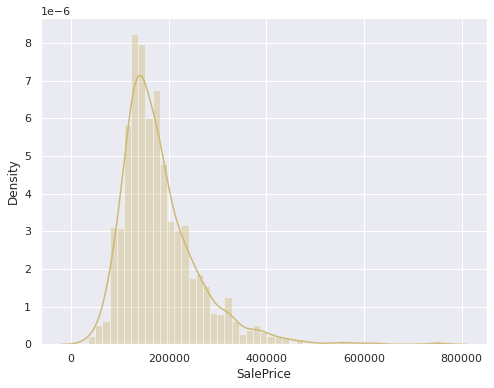

In [62]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['SalePrice'], color='y');

From the graph above, we can conclude that the sales price distribution is skewed right (it doesn't follow normal distribution). I will convert it into normal distribution later.

### Second: quantitative variables

In [63]:
num_feat = train_df.select_dtypes(include = ['float64', 'int64'])
num_feat.head()                             

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [64]:
num_feat = num_feat.drop(['Id'], axis=1)

In [65]:
print(num_feat.shape)

(1460, 37)


#### Relation between sales price and numerical features:

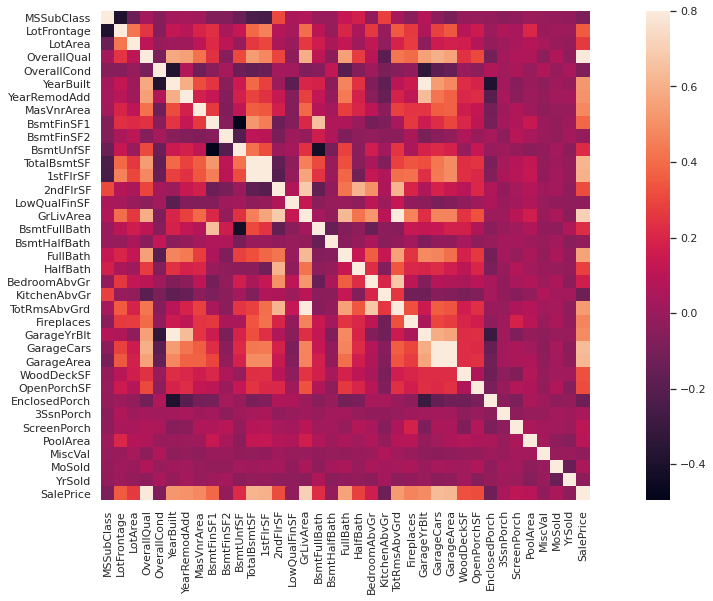

In [66]:
#correlation matrix
num_corr = num_feat.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(num_corr, vmax=.8, square=True);

Let's see which numerical features whose strong correlation with sales price

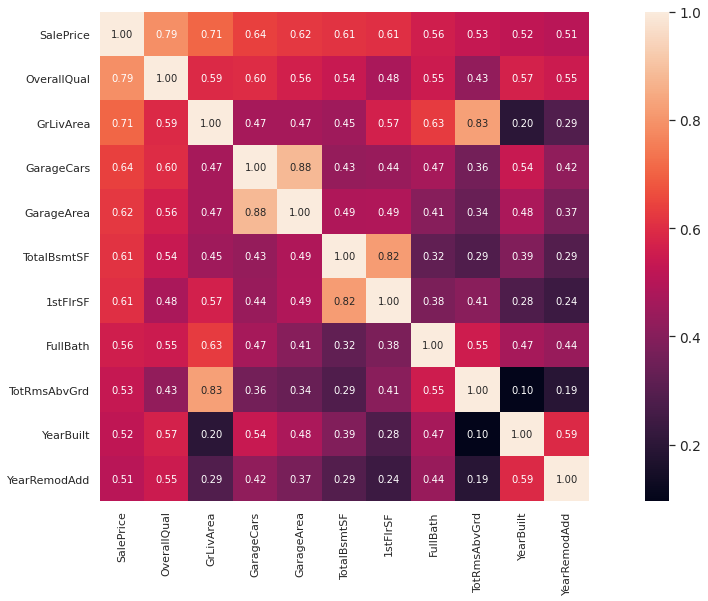

In [67]:
# saleprice correlation matrix
k = 11 #number of variables for heatmap
cols = num_corr.nlargest(k, 'SalePrice')['SalePrice'].index   # nlargest : pick the most powerfull correlation
cm = np.corrcoef(train_df[cols].values.T)
f, ax = plt.subplots(figsize=(20, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [68]:
num_corrlist = num_feat.corr()['SalePrice'][:-1]
numeric_list = num_corrlist[abs(num_corrlist) > 0.5].sort_values(ascending=False)
numeric_list

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Let examine each of them:
* OverallQual: Overall Quality
* GrLivArea: Above grade (ground) living area square feet
* GarageCars: Size of garage in car capacity 
* GarageArea: Size of garage in square feet
* TotalBsmtSF: Total square feet of basement area
* 1stFlrSF: First Floor square feet
* FullBath: Full bathrooms above grade
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

GragaeCars and GarageArea not only they have the same meaning, but they also have similar correlation number (almost). Hence, we can choose one and it will be GarageCars due to its higher correlation number.

TotalBsmtSF and 1stFlrSF both have a high correlation to each other. We can keep the former because of the higher correlation to the sales price.

GrLivArea and TotRmsAbvGrd have the same case as well, so TotRmsAbvGrd can be ignored.

The rest we can keep.

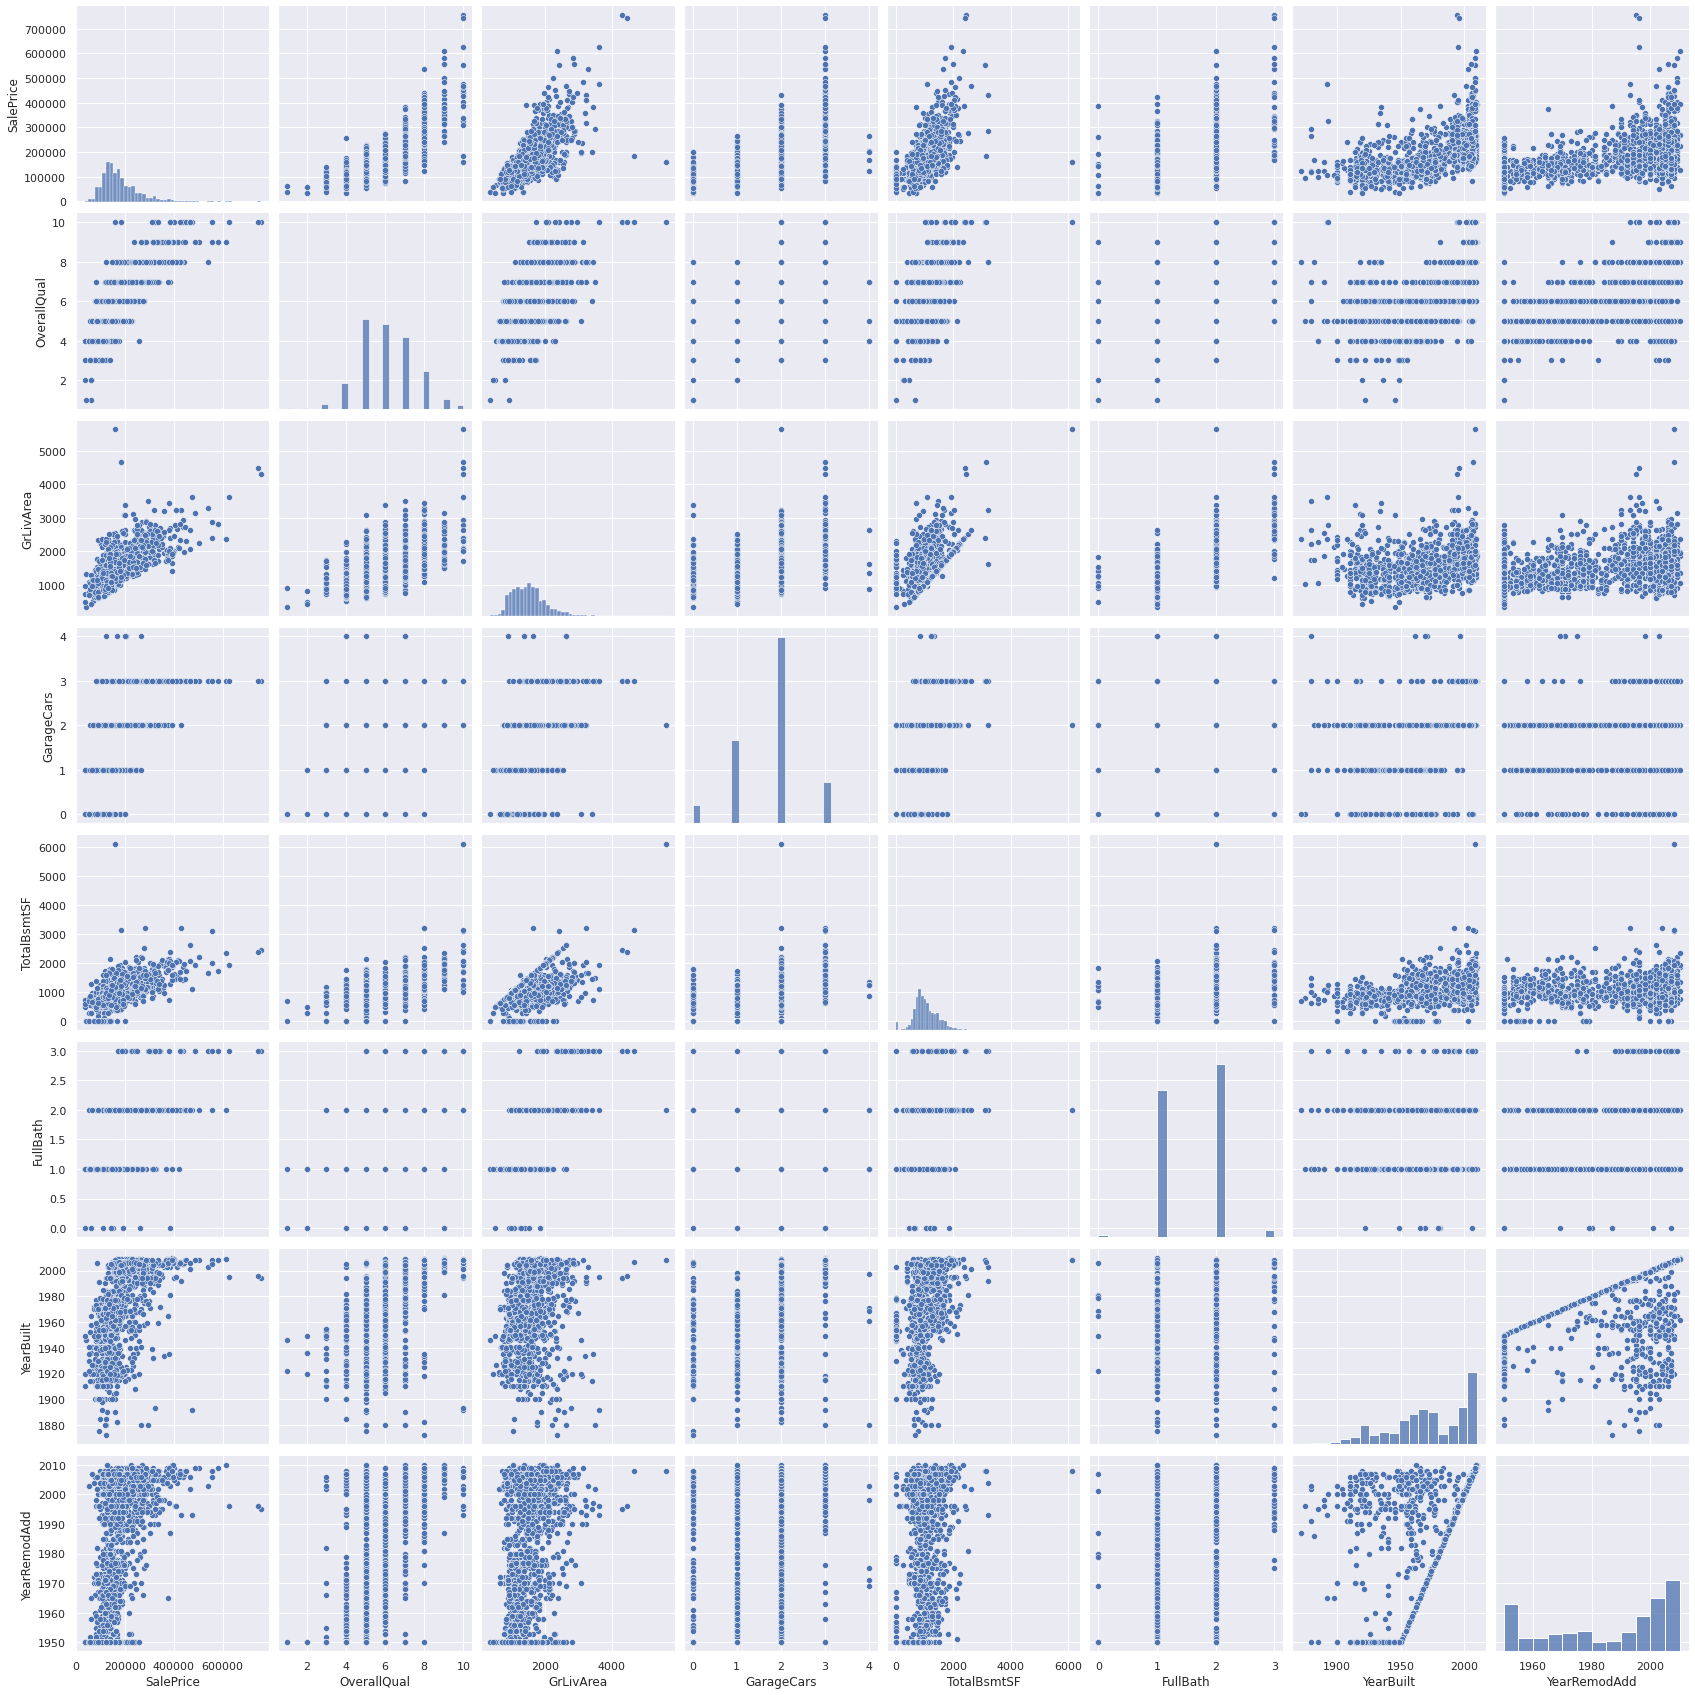

In [69]:
columns = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']
num_feat = num_feat[columns]

sns.set()
sns.pairplot(num_feat, height = 3)
plt.show();

Let see closer for some features

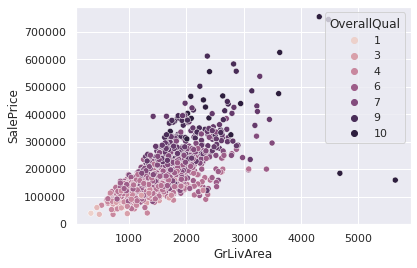

In [70]:
# OverallQual, GrLivArea, SalePrice
sns.scatterplot(data=num_feat, x='GrLivArea', y='SalePrice', hue = 'OverallQual');

So we can see that the bigger area above ground and the better overall quality of the house, the higher sales price will be.

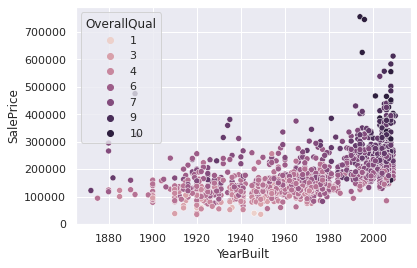

In [71]:
# YearBuilt, OverallQual, SalePrice
sns.scatterplot(data=num_feat, x='YearBuilt', y='SalePrice', hue = 'OverallQual');

Newer houses tend to have a better quality and more expensive price

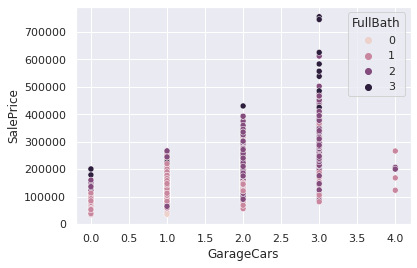

In [72]:
# GarageCars, FullBath, SalePrice
sns.scatterplot(data=num_feat, x='GarageCars', y='SalePrice', hue = 'FullBath');

Fore the same size of cars garage, the more full bathrooms it has, the sales price will increase as expected.

### Third: Qualitative Variables

In [73]:
cat_feat = train_df.select_dtypes(['object'])
cat_feat.head()   

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


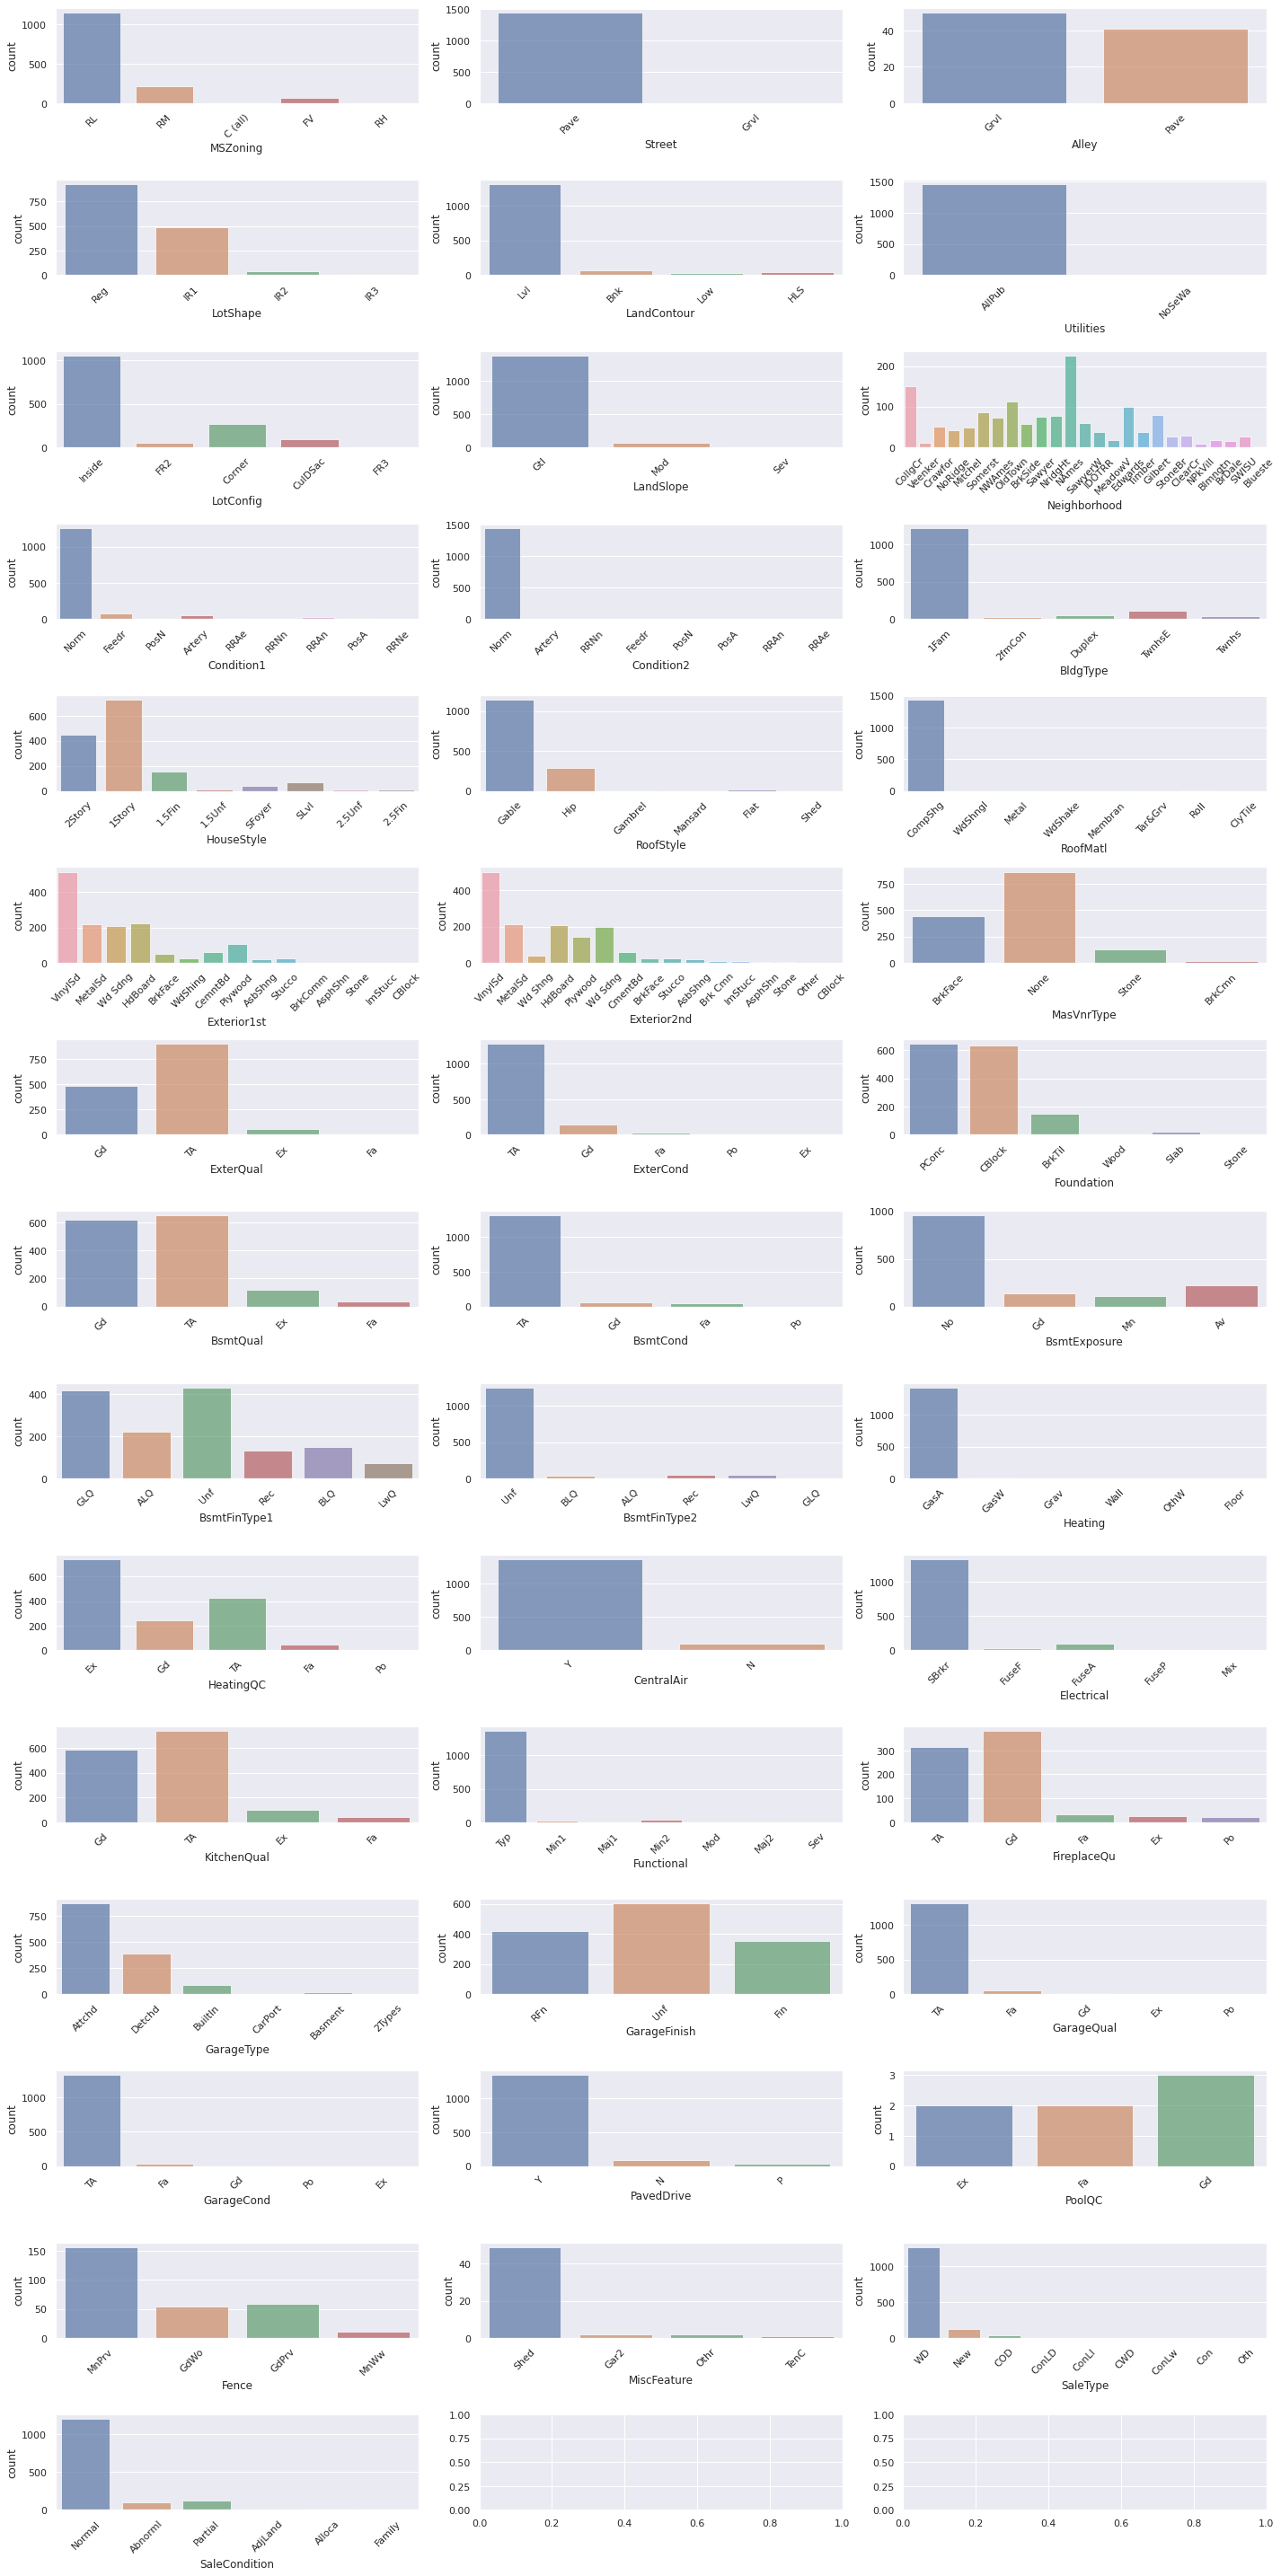

In [74]:
# Their distribution
fig, axes = plt.subplots(15, 3, figsize=(20, 40))

for i, ax in enumerate(fig.axes):
    if i < len(cat_feat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=cat_feat.columns[i], alpha=0.7, data=cat_feat, ax=ax)

fig.tight_layout()

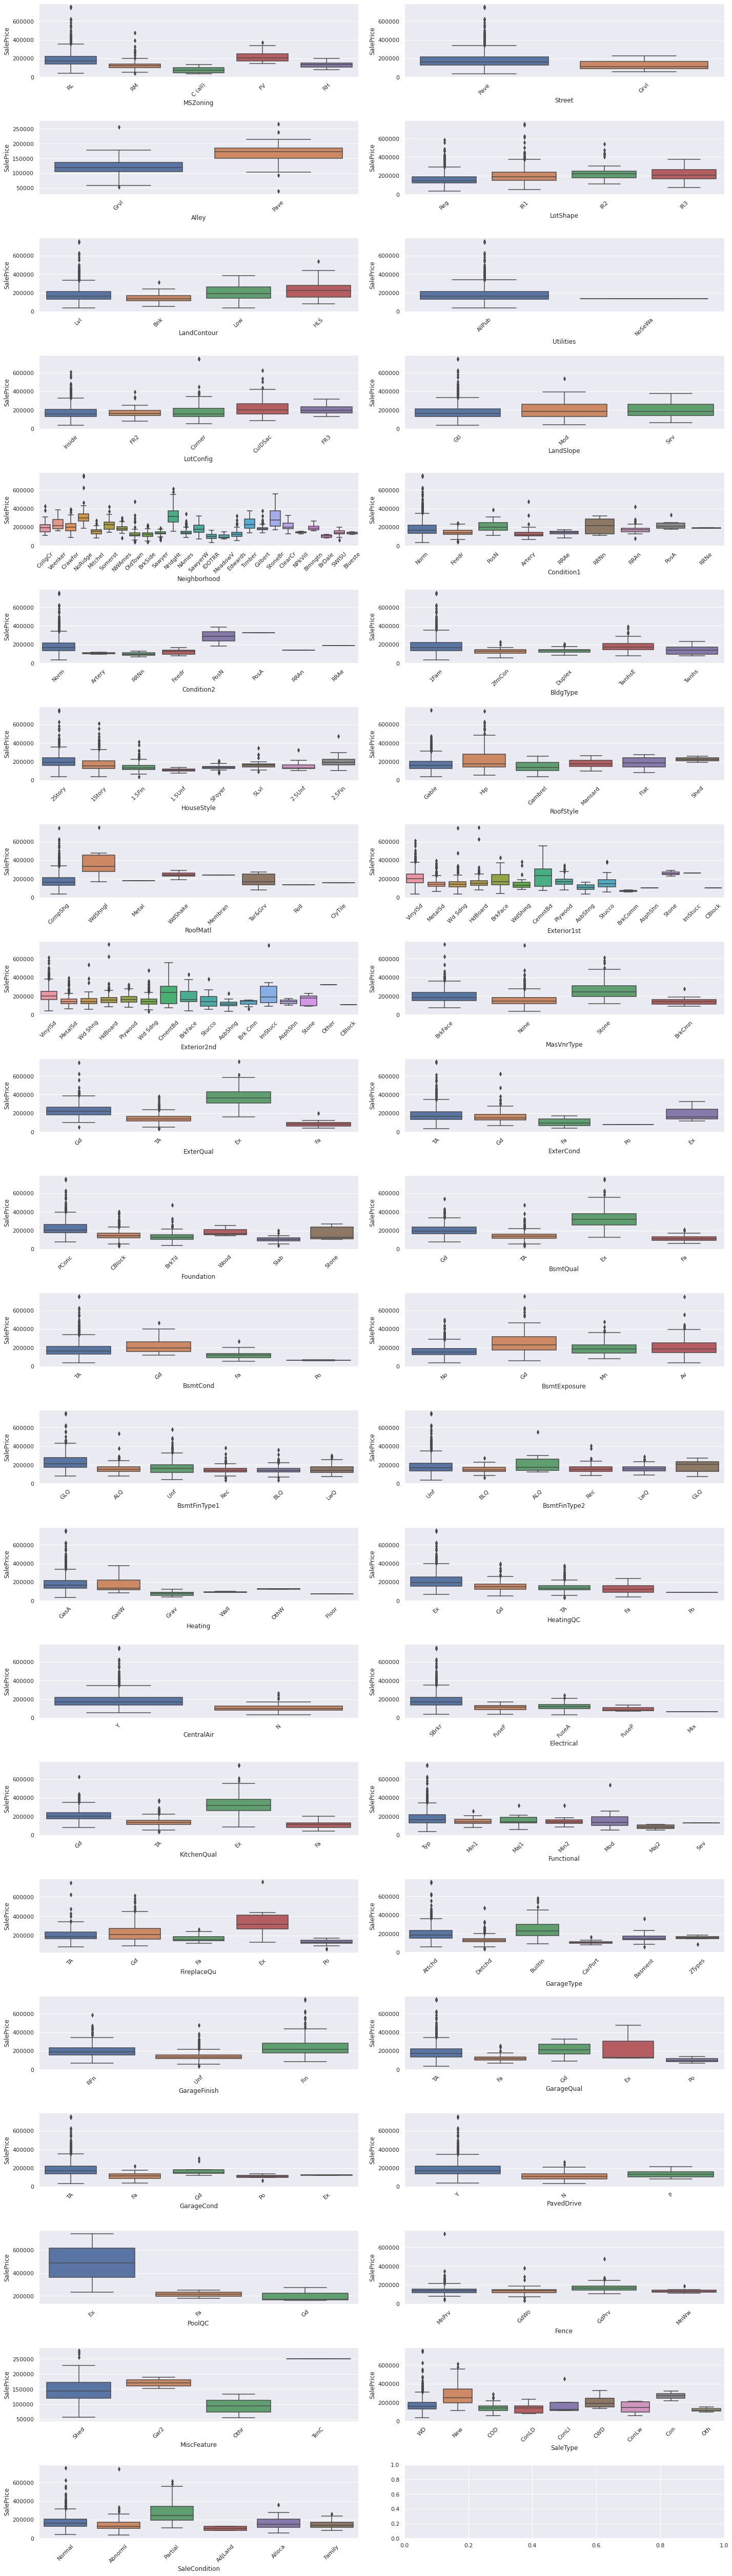

In [75]:
cat_feat_price = pd.concat([cat_feat, num_feat['SalePrice']], axis=1)

fig, axes = plt.subplots(22, 2, figsize=(20, 70))

for i, ax in enumerate(fig.axes):
    if i < len(cat_feat_price.columns)-1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(data = cat_feat_price, x=cat_feat_price.columns[i], y='SalePrice', ax = ax)

fig.tight_layout()

# Data Cleaning: 

### Handling Missing Values

In [76]:
all_data = pd.concat([train_df, test_df], axis=0, sort=False)
all_data = all_data.drop(['Id', 'SalePrice'], axis=1)
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


It's time to handle missing data

In [77]:
null_val = pd.DataFrame(all_data.isna().sum(), columns = ['Nan_sum'])
null_val = null_val[null_val['Nan_sum']>0]
null_val['Percentage'] = (null_val['Nan_sum']/len(all_data))*100
null_val = null_val.sort_values(by=['Nan_sum'], ascending=False)
null_val

,Nan_sum,Percentage
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071
GarageYrBlt,159,5.447071


If we look at what those features above reprsent, we will know that none of them are considered important for sales price analysis. Addition to their large number of missing values, it will be better to drop them.

In [78]:
# drop the missing data
all_data = all_data.drop((null_val[null_val['Nan_sum']>5]).index,1)

In [79]:
num_null = ['GarageArea', 'GarageCars', 'BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1']
cat_null = ['Functional', 'Utilities', 'Electrical', 'KitchenQual', 'MSZoning', 'Exterior2nd', 'Exterior1st', 'SaleType']

for x in num_null:
    all_data[x] = all_data[x].fillna(0)
    
for x in cat_null:
    all_data[x] = all_data[x].fillna(all_data[x].mode()[0])

In [80]:
# check null values after treatment
all_data.isnull().sum().max()

0

### Dealing with skewness

In [81]:
# code source: https://www.kaggle.com/adamml/how-to-be-in-top-10-for-beginner
non_object_feat = all_data.dtypes[all_data.dtypes != 'object']. index
skewed_feat = all_data[non_object_feat].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feat[abs(skewed_feat)>0.5]
high_skew

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
YearBuilt        -0.599806
dtype: float64

In [82]:
# change skewed distribution into normal distribution
for x in high_skew.index:
    all_data[x] = np.log1p(all_data[x])

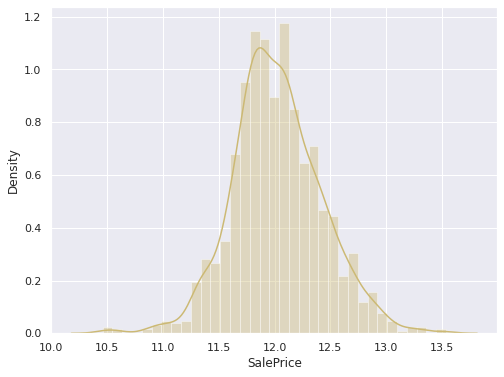

In [83]:
# for sales prediction
train2_df = train_df.copy()
train2_df['SalePrice'] = np.log1p(train2_df['SalePrice'])
y_log = train2_df['SalePrice']

plt.figure(figsize=(8,6))
sns.distplot(train2_df['SalePrice'], color='y');

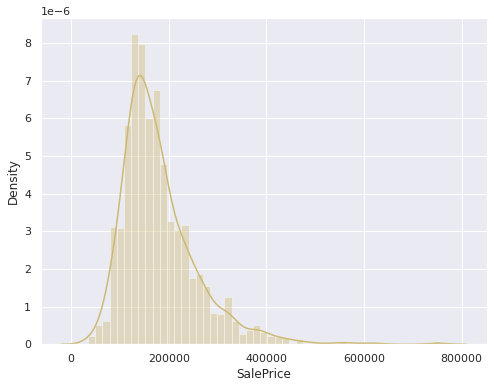

In [84]:
# if we compare it to distribution of sales price earlier (below), it shows that the distribution of sales price is now normal
plt.figure(figsize=(8,6))
sns.distplot(train_df['SalePrice'], color='y');

### Dummy for categorical variables

In [85]:
all_data = pd.get_dummies(all_data)
all_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,7,1.791759,7.602900,2003,6.561031,0.0,5.017280,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,9.169623,6,2.197225,7.589336,1976,6.886532,0.0,5.652489,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,9.328212,7,1.791759,7.601902,2002,6.188264,0.0,6.075346,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,9.164401,7,1.791759,7.557995,1970,5.379897,0.0,6.293419,6.629363,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,9.565284,8,1.791759,7.601402,2000,6.486161,0.0,6.196444,7.044033,...,0,0,0,1,0,0,0,0,1,0


# Apply ML

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [87]:
# separate data for training and testing
X = all_data[:len(y_log)]
X_test_data = all_data[len(y_log):]

In [88]:
X.shape, X_test_data.shape

((1460, 220), (1459, 220))

In [89]:
# Creation of the RMSE metric:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X, y_log, scoring = 'neg_mean_squared_error', cv = kf))
    return (rmse)

In [90]:
# K Fold Cross validation
kf = KFold(n_splits = 7, random_state = 234, shuffle = True)

cv_scores = []
cv_std = []

baseline_models = ['Linear_reg', 'Random_Forest_reg', 'Grad_Boost_reg', 'XGB_reg']

In [91]:
# Linear Regression

lr = LinearRegression()
score_lr = cv_rmse(lr)
cv_scores.append(score_lr.mean())
cv_std.append(score_lr.std())


# Random Forest Regressor

rf = RandomForestRegressor()
score_rf = cv_rmse(rf)
cv_scores.append(score_rf.mean())
cv_std.append(score_rf.std())


# Gradient Boost Regressor

gb = GradientBoostingRegressor()
score_gb = cv_rmse(gb)
cv_scores.append(score_gb.mean())
cv_std.append(score_gb.std())


# XGB Regressor

xgb = XGBRegressor()
score_xgb = cv_rmse(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

In [92]:
cv_score_results = pd.DataFrame(baseline_models, columns = ['Regressors'])
cv_score_results['RMSE_mean'] = cv_scores
cv_score_results['RMSE_std'] = cv_std

In [93]:
cv_score_results

,Regressors,RMSE_mean,RMSE_std
0,Linear_reg,0.133285,0.010301
1,Random_Forest_reg,0.141051,0.010774
2,Grad_Boost_reg,0.128750,0.010745
3,XGB_reg,0.138442,0.012597


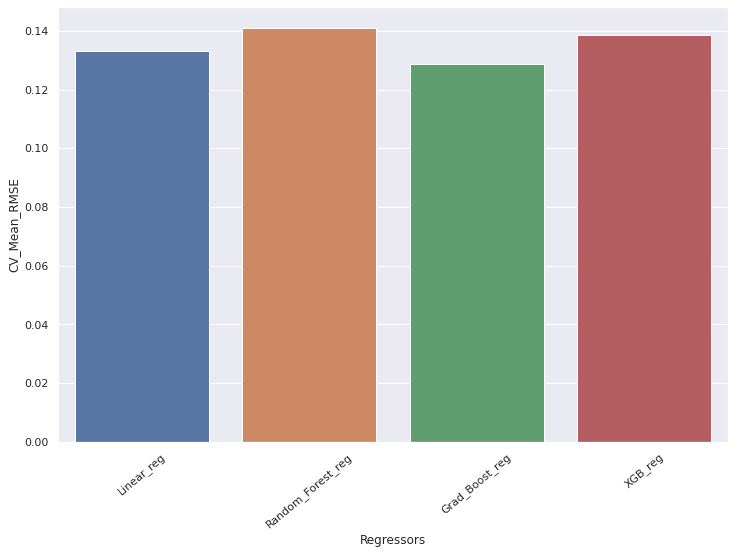

In [94]:
# visualization of cv_score_results
plt.figure(figsize = (12,8))
sns.barplot(cv_score_results['Regressors'],cv_score_results['RMSE_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=40)
plt.show()

In [95]:
# Linear Regression
linear_model = lr.fit(X,y_log)
test_lr = lr.predict(X_test_data)
result = pd.DataFrame(test_df, columns = ['Id'])
test_pre = np.expm1(test_lr)
result['SalePrice'] = test_pre

result.to_csv("linear_result.csv", index = False, header = True)

In [96]:
# Random Forest
forest_model = rf.fit(X,y_log)
test_rf = rf.predict(X_test_data)
result = pd.DataFrame(test_df, columns = ['Id'])
test_pre = np.expm1(test_rf)
result['SalePrice'] = test_pre

result.to_csv("rforest_result.csv", index = False, header = True)

In [97]:
# XGB
xgb_model = xgb.fit(X,y_log)
test_xgb = xgb.predict(X_test_data)
result = pd.DataFrame(test_df, columns = ['Id'])
test_pre = np.expm1(test_xgb)
result['SalePrice'] = test_pre

result.to_csv("xgb_result.csv", index = False, header = True)

In [98]:
# Gradient Boosting
gb_model = gb.fit(X,y_log)
test_gb = gb.predict(X_test_data)
result = pd.DataFrame(test_df, columns = ['Id'])
test_pre = np.expm1(test_gb)
result['SalePrice'] = test_pre

result.to_csv("gradient_result.csv", index = False, header = True)

Further analysis can be done if we feel courious about it. We can drop the features we think are not significant to sales prediction, combine features that have similar purpose, or using only the important variables in building our regression models.

I might be do some mistakes here and there in this project. Feel free to tell me or comment on anything you think necessary.